# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

El método de las "Curvas de Aprendizaje" es una herramienta útil en el campo del aprendizaje automático para evaluar el rendimiento de un modelo a medida que aumenta la cantidad de datos de entrenamiento. Consiste en trazar gráficos que muestran cómo varía el rendimiento del modelo (por ejemplo, la precisión en el caso de la clasificación o el error en el caso de la regresión) en función del tamaño del conjunto de entrenamiento.

Al graficar las curvas de aprendizaje, se pueden observar varias situaciones:

Sobreajuste: Si la curva de error en el conjunto de entrenamiento es mucho menor que la del conjunto de prueba y ambas están en una tendencia divergente, es indicativo de sobreajuste. Esto implica que el modelo está memorizando los datos de entrenamiento en lugar de aprender patrones generales.

Subajuste: Si tanto la curva de error en el conjunto de entrenamiento como la del conjunto de prueba son altas y convergen a un valor similar, esto sugiere subajuste. Esto indica que el modelo es demasiado simple y no puede capturar la complejidad de los datos.

Modelo bien ajustado: Cuando tanto la curva de error en el conjunto de entrenamiento como la del conjunto de prueba disminuyen y se estabilizan en valores bajos y similares a medida que aumenta el tamaño del conjunto de datos de entrenamiento, esto sugiere que el modelo está bien ajustado.

Al interpretar estas curvas, los practicantes de aprendizaje automático pueden tomar decisiones informadas sobre si se necesita más datos, una arquitectura de modelo diferente o ajustes en la regularización para mejorar el rendimiento del modelo. En resumen, las curvas de aprendizaje son una herramienta valiosa para diagnosticar problemas de subajuste y sobreajuste y para tomar decisiones sobre cómo mejorar la capacidad predictiva de un modelo de aprendizaje automático.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++



El objetivo del problema planteado en el artículo es utilizar técnicas de minería de datos para predecir las métricas de rendimiento de las publicaciones realizadas en las páginas de Facebook de las marcas, centrándose específicamente en una página de una empresa cosmética. Se busca comprender cómo diferentes características de las publicaciones afectan su rendimiento y utilizar esta información para apoyar las decisiones de los gerentes sobre qué publicaciones publicar en la página de Facebook de la marca. En resumen, el objetivo es mejorar la efectividad de la estrategia de contenido en las páginas de Facebook de las marcas utilizando análisis predictivo basado en datos.



### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++
Inputs:

* Category - Manual content characterization: action (special offers and contests), product (direct advertisement, explicit brand content), and inspiration (non-explicit brand related content).

* Page total likes	Number of people who have liked the company's page.
* Type	Type of content (Link, Photo, Status, Video).
* Post month	Month the post was published (January, February, March, …, December).
* Post hour	Hour the post was published (0, 1, 2, 3, 4, …, 23).
* Post weekday	Weekday the post was published (Sunday, Monday, …, Saturday).
* Paid	If the company paid to Facebook for advertising (yes, no).

Output

* Lifetime post consumers - The number of people who clicked anywhere in a post.

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargamos los datos:
my_data='/content/drive/MyDrive/Inteligencia artificial y aprendizaje automático/Actividad Semana 7 - Curvas de Aprendizaje/Teoria/facebook+metrics/dataset_Facebook.csv'


data = pd.read_csv(my_data, sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [4]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [5]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [6]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


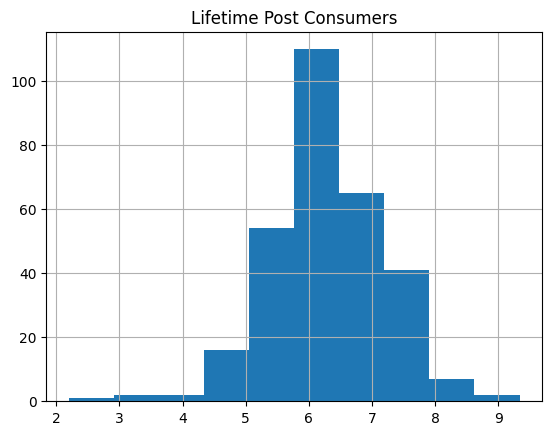

In [8]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [9]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [10]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [11]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


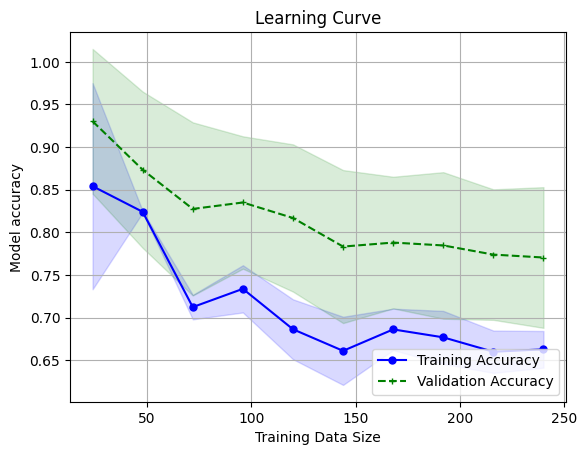

In [26]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


## el modelo con valores predeterminados presenta un sobre-entrenamiento.

elmodelo_RF = RandomForestRegressor(n_estimators=50,
                                    max_features='sqrt',
                                    min_samples_split=5,
                                    min_samples_leaf=4,
                                    max_depth=10,
                                    random_state=42)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv= 5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [27]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=50,
                                    max_features='sqrt',
                                    min_samples_split=5,
                                    min_samples_leaf=4,
                                    max_depth=10,
                                    random_state=42)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.751


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [ ]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

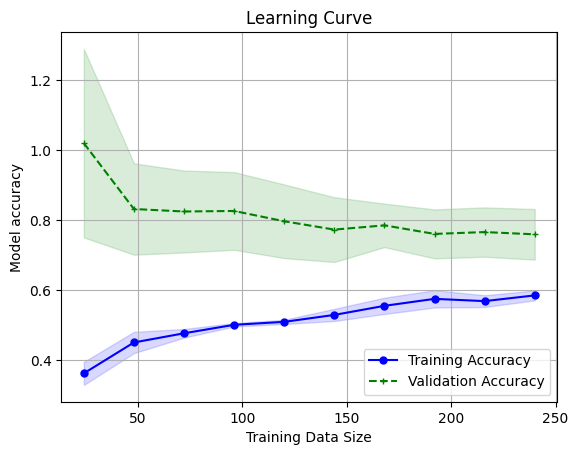

Error RSME(Test) de Extreme Gradient Boost XGBoost: 0.683


In [41]:
## Extreme Gradient Boost XGBoost

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


elmodelo_XGB = XGBRegressor(colsample_bytree=1,
                            learning_rate = 0.05,
                            max_depth=3,
                            n_estimators=50,
                            subsample=0.8)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_XGB)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv= 5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_XGB)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Extreme Gradient Boost XGBoost: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

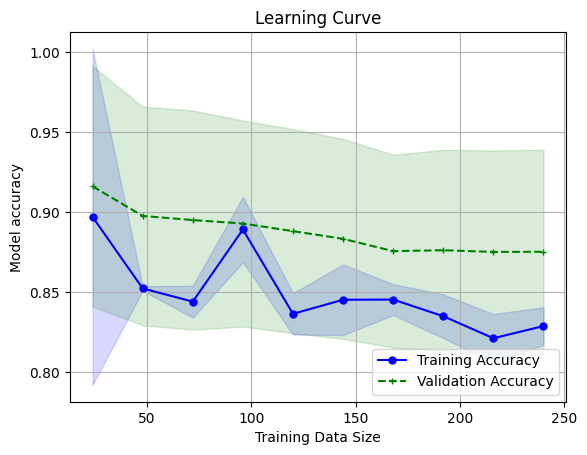

Error RSME(Test) de Máquina de Vector Soporte SVM: 0.877


In [42]:
##Máquina de Vector Soporte SVM

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


elmodelo_SVR = SVR(C= 0.1, degree= 2, epsilon= 0.01, gamma= 0.001, kernel='rbf',shrinking=True)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_SVR)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv= 5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_SVR)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Máquina de Vector Soporte SVM: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

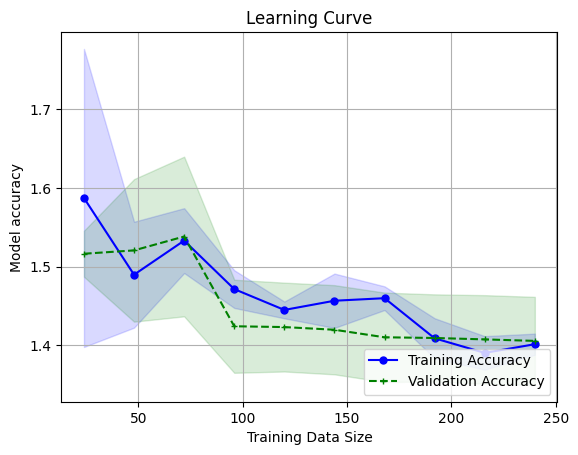

Error RSME(Test) de Red Neuronal Perceptrón Multicapa MLP: 1.103


In [46]:
##Red Neuronal Perceptrón Multicapa MLP

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


elmodelo_MLP = MLPRegressor(
     hidden_layer_sizes=(50,),  # El tamaño de las capas ocultas. Cada elemento representa el número de neuronas en la capa oculta correspondiente.
    activation='relu',         # La función de activación para las capas ocultas. Puede ser 'identity', 'logistic', 'tanh' o 'relu'.
    solver='adam',             # El solver utilizado para la optimización de los pesos. Puede ser 'lbfgs', 'sgd' o 'adam'.
    alpha=0.0003,              # La fuerza del término de regularización L2.
    learning_rate_init=0.001,  # Tasa de aprendizaje inicial.
    max_iter=200,              # Número máximo de iteraciones.
    random_state=2,            # Semilla para la reproducibilidad.
    tol=0.0001,                # Tolerancia para la optimización.
    momentum=0.9,              # Momentum para el optimizador 'sgd'.
    nesterovs_momentum=True,   # Nesterov's momentum.
    early_stopping=False,      # Detención temprana.
    validation_fraction=0.1,   # Fracción de los datos para validación.
    beta_1=0.6,                # Coeficientes para la estimación de momentos en 'adam'.
    beta_2=0.9999,
    epsilon=1e-08              # Valor para la estabilidad numérica en 'adam'.
)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_MLP)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv= 5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

# Grafica la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_MLP)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)
print('Error RSME(Test) de Red Neuronal Perceptrón Multicapa MLP: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++
Red Neuronal Perceptrón Multicapa (MLP): Registró un RMSE de 1.103 en el conjunto de prueba.

Random Forest: Registró un RMSE de 0.751 en el conjunto de prueba.

Extreme Gradient Boost (XGBoost): Obtuvo el RMSE más bajo de 0.683 en el conjunto de validación.

Máquina de Vector de Soporte (SVM): Registró un RMSE de 0.877 en el conjunto de prueba.

Basándonos en estos resultados, el modelo Extreme Gradient Boost (XGBoost) sigue siendo el mejor modelo obtenido para este problema de predicción del rendimiento de publicaciones en la página de Facebook de la empresa cosmética en términos de Lifetime Post Consumers.



### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**